# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [5]:
df=pd.read_csv("Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔍 Step 2: Explore the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.shape

(569, 33)

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [11]:
# Drop the 'Unnamed: 32' column and 'id'
df=df.drop("Unnamed: 32", axis=1)
df=df.drop("id", axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 📊 Step 4: Visualize the Data

In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
num_cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

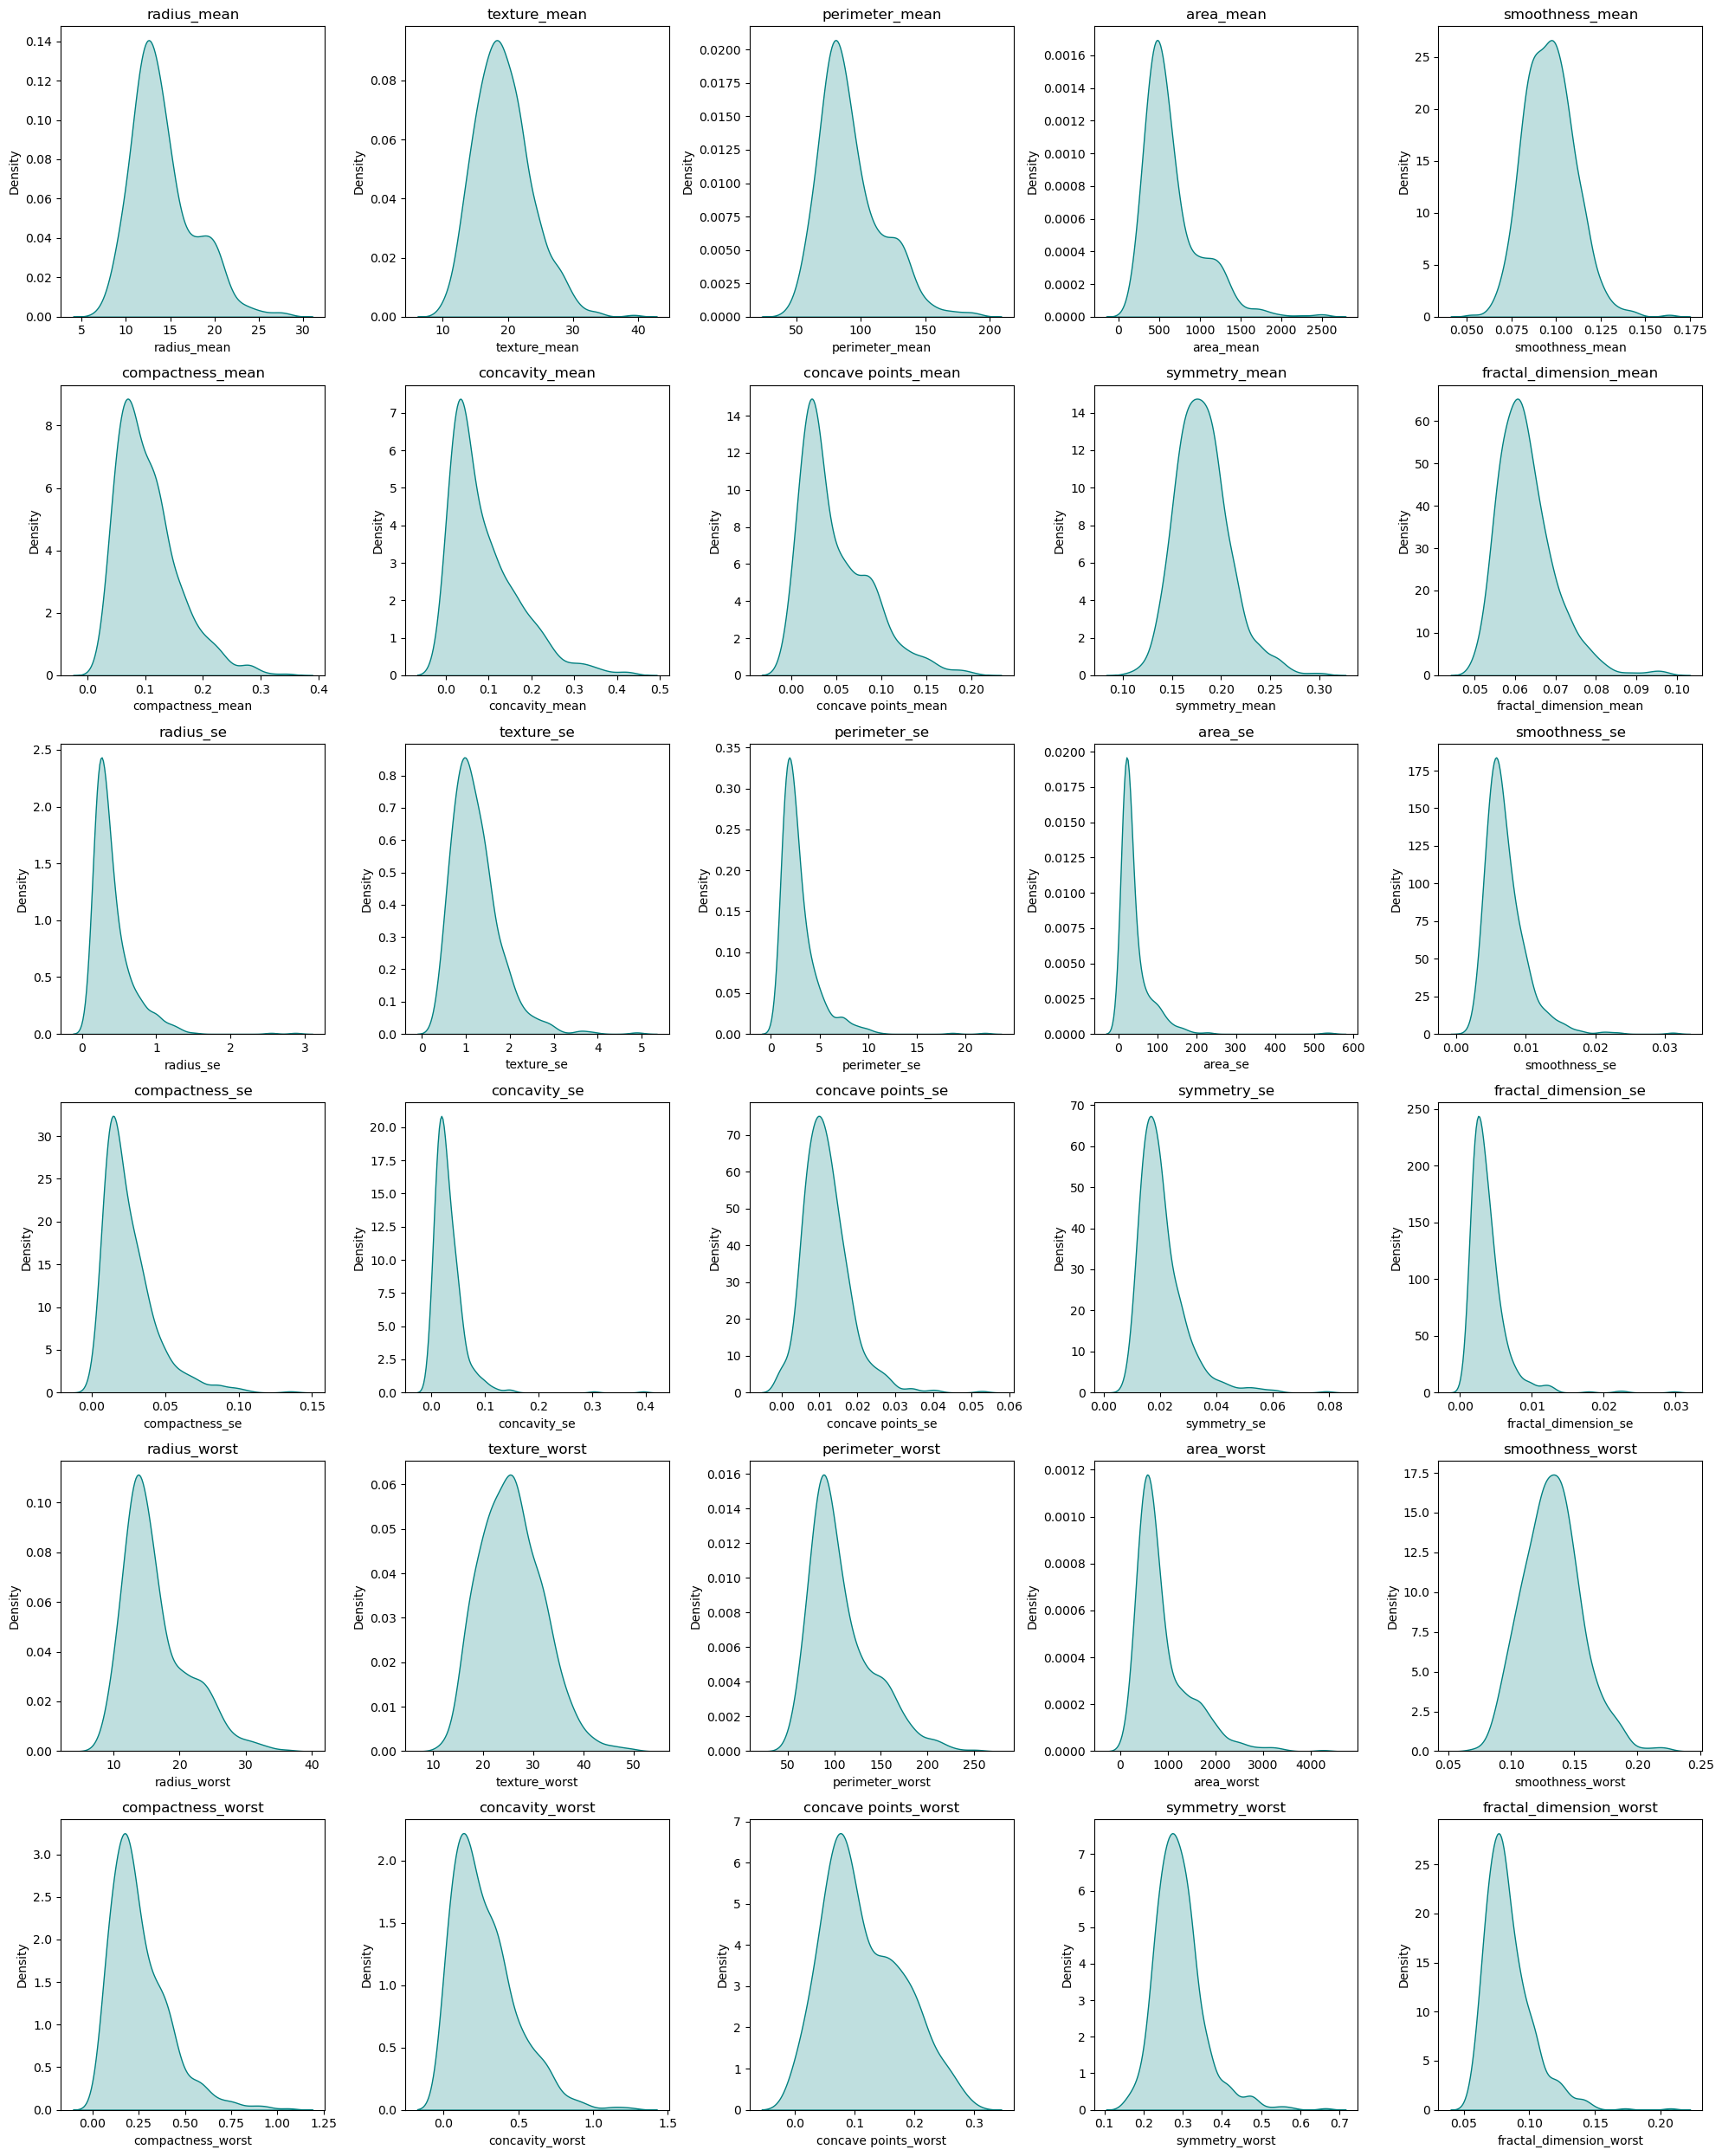

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 25))

for i, col in enumerate(num_cols):
    plt.subplot(6, 5, i + 1)
    sns.kdeplot(df[col], shade=True, color='teal')
    plt.title(col)

plt.tight_layout()
plt.show()


### Overall Conclusion from KDE Plots (All Features)

The KDE plots for all numerical features in the breast cancer dataset — including mean, standard error (se), and worst-case (worst) metrics — show several key distribution patterns:

1. **Right-Skewed Distributions**:
   - Most features such as `area_mean`, `perimeter_se`, `area_se`, `area_worst`, `compactness_worst`, and `concavity_worst` are heavily right-skewed.
   - This indicates that a small number of samples have very high values, suggesting the presence of potential outliers.

2. **Sharp Peaks with Low Variance**:
   - Features like `fractal_dimension_se`, `smoothness_se`, and `symmetry_se` show tightly concentrated values, with little spread.
   - These may contribute less to prediction unless they show strong correlation with the target variable.

3. **Approximate Normal Distributions**:
   - Some features like `texture_mean`, `texture_worst`, and `symmetry_mean` have relatively symmetric, bell-shaped distributions.
   - These are well-behaved features that typically require less transformation.

4. **Highly Skewed SE and Worst Features**:
   - Most `_se` and `_worst` features are **more skewed** than their mean counterparts, especially `concavity_se`, `area_se`, `radius_worst`, and `concavity_worst`.
   - These features will benefit from scaling or transformation to normalize them before model training.

5. **Multimodal Patterns**:
   - A few features, such as `radius_worst` and `concave points_worst`, show slight signs of bimodal or complex distributions, which might reflect class differences (benign vs malignant).

6. **Preprocessing Recommendation**:
   - Apply **feature scaling** (e.g., StandardScalnto machine learning models.
e models.
e models.


In [17]:
df['diagnosis'].value_counts(normalize=True)*100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

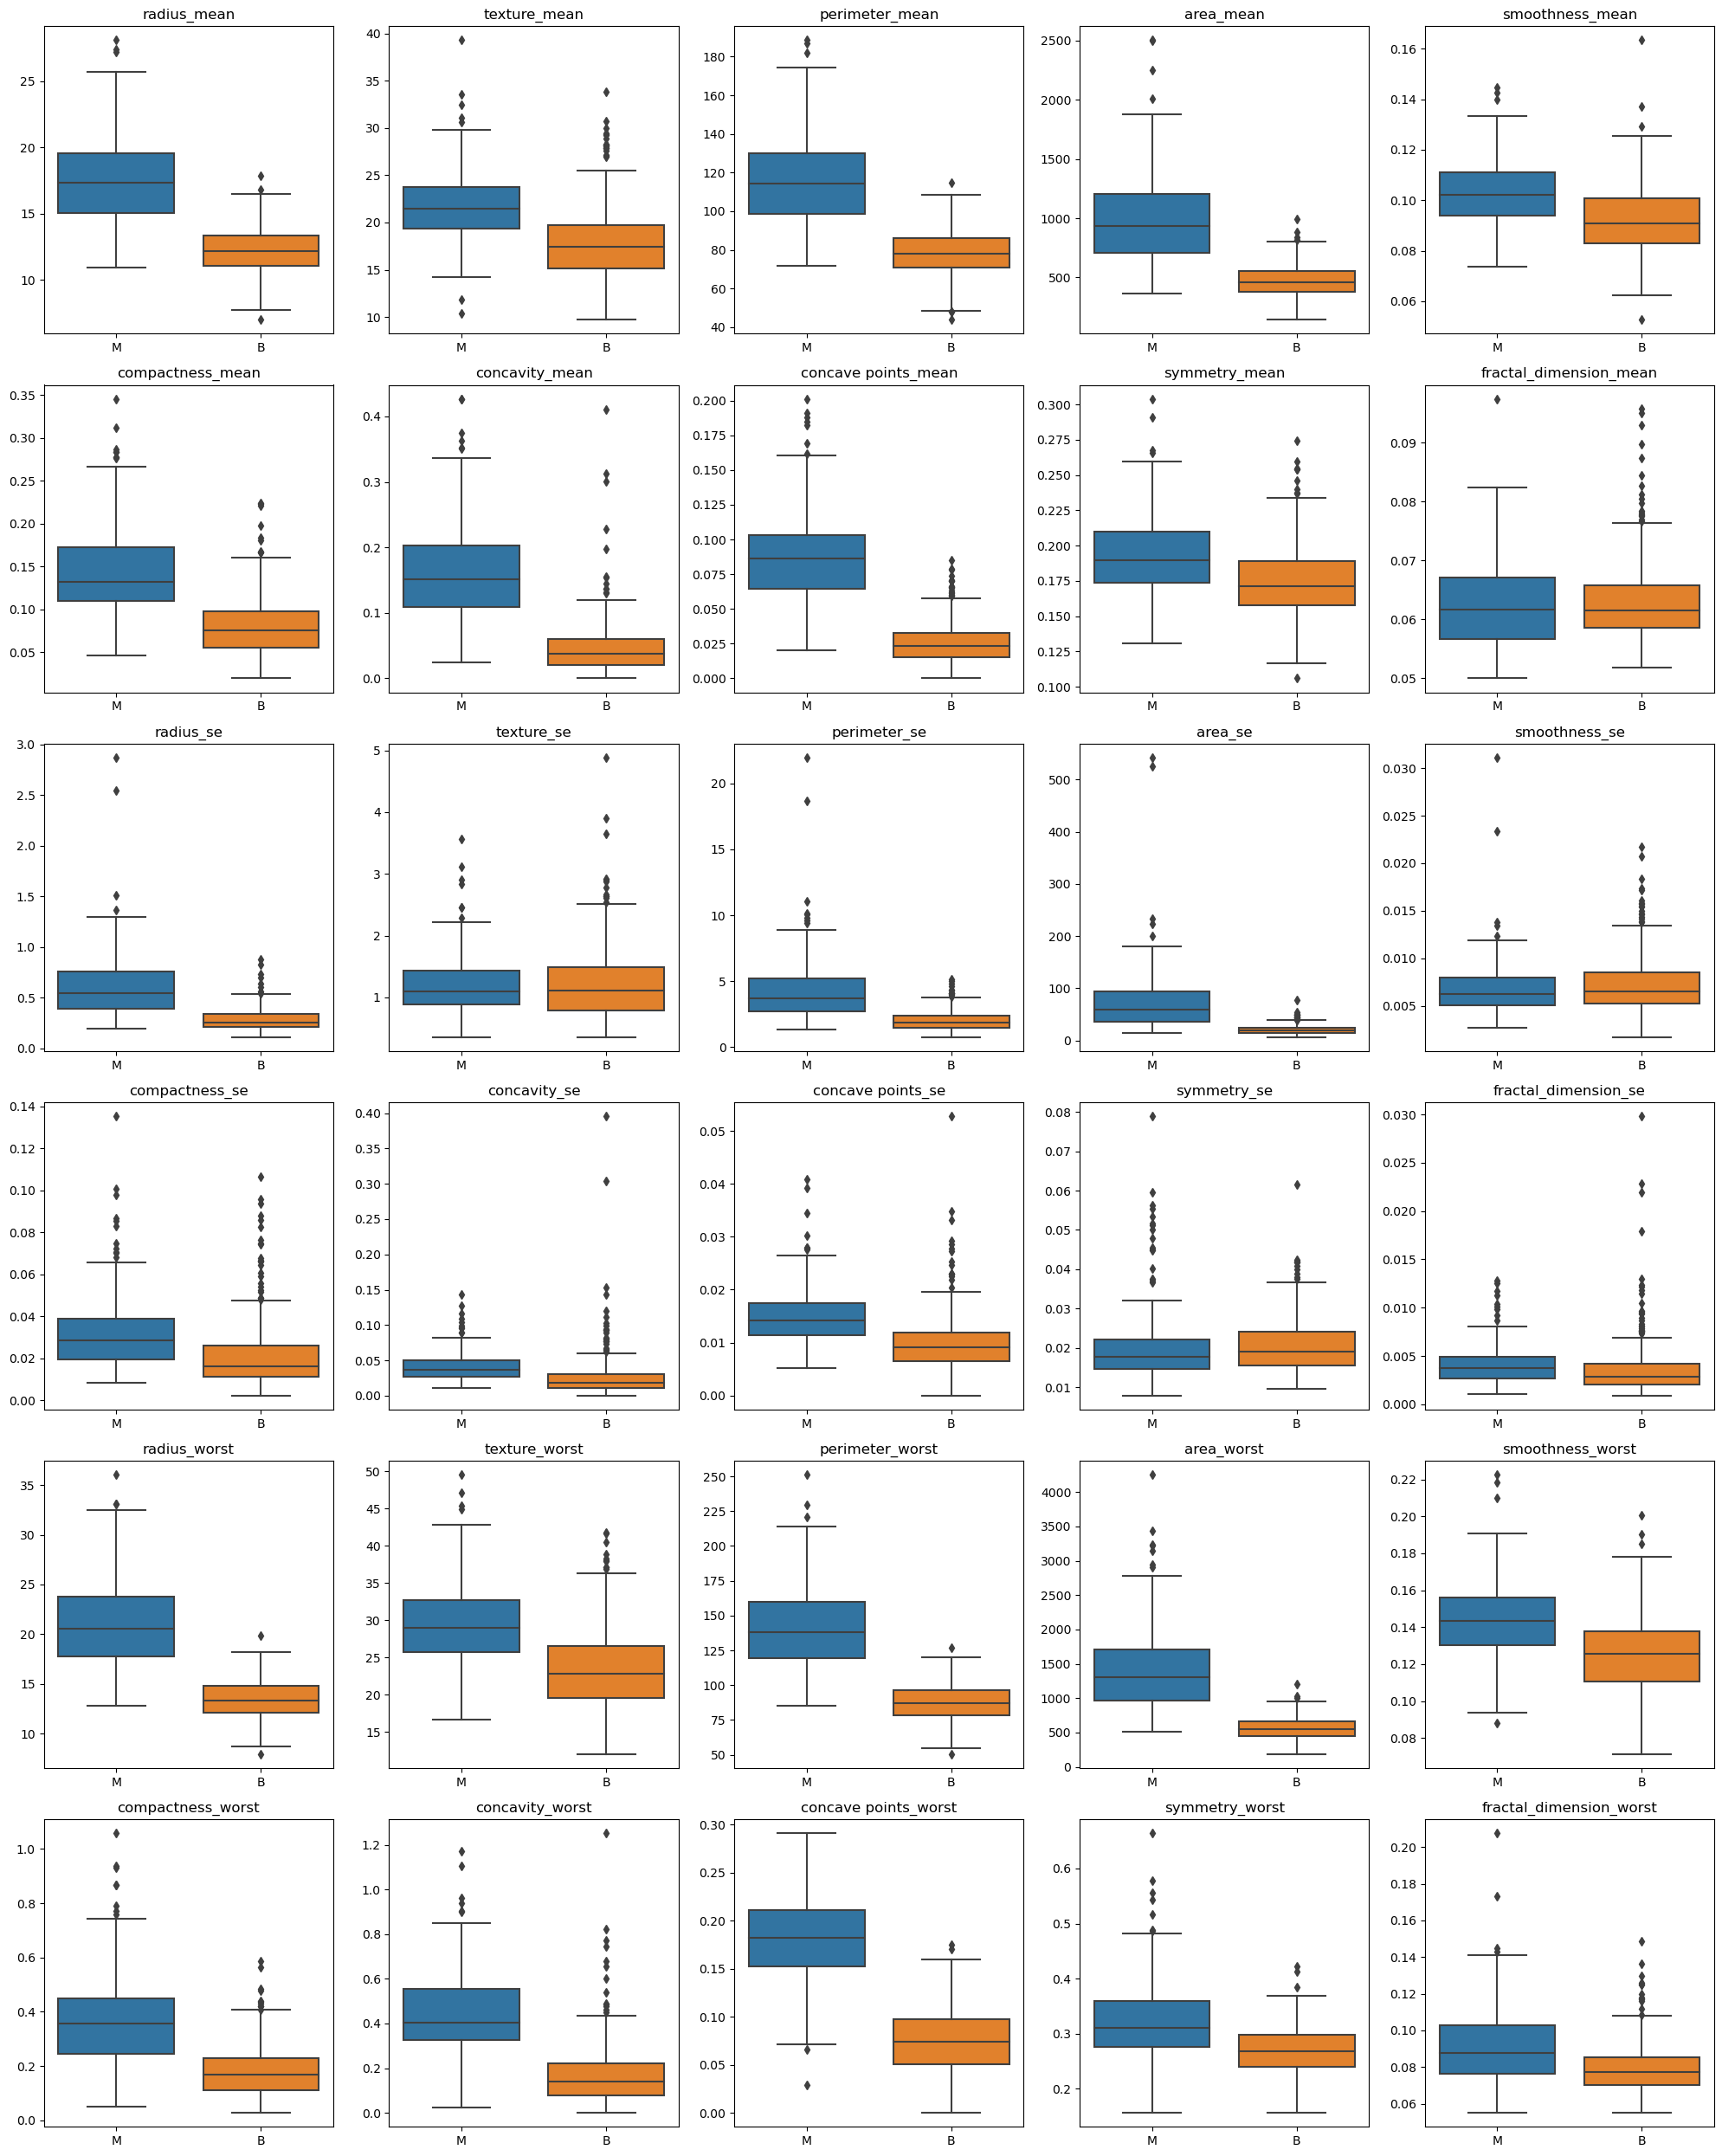

In [18]:
rows = 6
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Feature-wise Boxplot Analysis by Diagnosis (M vs B)

The boxplots comparing malignant (M) and benign (B) tumors across various numerical features reveal key patterns in the data. 

For the **mean features**, attributes like `radius_mean`, `perimeter_mean`, and `area_mean` show significantly higher values in malignant tumors compared to benign ones. This indicates that malignant tumors tend to be larger and more irregular in shape. Features such as `texture_mean`, `concavity_mean`, and `concave_points_mean` are also notably higher in malignant cases, suggesting a rougher texture and greater structural complexity. On the other hand, features like `smoothness_mean`, `compactness_mean`, and `symmetry_mean` show a smaller yet visible difference between the two classes, offering moderate discriminative power. The `fractal_dimension_mean` feature overlaps heavily between M and B and appears to be the weakest among the mean-based features in terms of separation.

When looking at the **standard error (SE) features**, variables like `radius_se`, `area_se`, and `perimeter_se` again exhibit clear separation, with malignant tumors having greater variability. These features suggest that not only are malignant tumors larger, but they also vary more across different parts of the tumor mass. Similarly, `compactness_se`, `concavity_se`, and `concave_points_se` tend to be elevated for malignant samples, adding potential value for classification. However, features like `texture_se`, `symmetry_se`, and `fractal_dimension_se` display substantial overlap and are less useful on their own for diagnosis.

The **worst-case (maximum) features** provide the clearest distinction. Variables such as `radius_worst`, `area_worst`, and `perimeter_worst` are much higher in malignant tumors, indicating that the most extreme measurements for these cases are significantly different from benign ones. Similarly, `concavity_worst`, `concave_points_worst`, and `texture_worst` show substantial elevation for malignant samples. While `compactness_worst`, `smoothness_worst`, and `symmetry_worst` offer moderate separability, `fractal_dimension_worst` again shows limited distinguishing ability between classes.

In summary, size-related features and those capturing shape irregularity—particularly their worst-case values—are highly effective in distinguishing between malignant and benign tumors. These patterns can guide feature selection and model building in breast cancer classification tasks.
e predictive pipeline.


In [20]:
# outlier treatment
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


## ⚙️ Step 5: Preprocess the Data

In [22]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Split features and labels
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']                 # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [24]:
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.575860,0.927576,0.474940,0.510883,-0.996070,-0.720020,-0.722292,-0.401095,-1.079296,-0.868734,...,0.636346,1.339501,0.513837,0.614000,-0.603120,-0.668231,-0.630388,-0.235744,0.114101,0.064065
1,-0.527084,-1.679708,-0.554273,-0.581616,0.500573,-0.657225,-0.630167,-0.302453,0.568148,-0.467329,...,-0.596529,-1.712617,-0.627470,-0.643229,0.287993,-0.866734,-0.739727,-0.323208,-0.109444,-0.990300
2,-0.369095,0.478210,-0.391153,-0.416611,-1.468732,-0.388534,-0.343751,-0.782057,-0.880532,-0.219951,...,-0.401523,0.189937,-0.483064,-0.440909,-1.654982,-0.400078,-0.439422,-0.890825,-0.735738,-0.124730
3,0.241996,0.756961,0.449048,0.141588,0.260273,2.415911,2.495501,1.270324,0.881582,0.999824,...,0.020992,0.283643,0.563418,-0.049869,0.436512,2.618210,2.592349,1.977064,-0.037392,2.007209
4,1.347921,0.209071,1.312119,1.480610,-0.105589,0.083234,0.831102,0.752257,-0.433315,-0.865622,...,1.095695,0.231770,1.012752,1.143337,0.082688,-0.274011,0.370797,0.501859,-1.007316,-0.582604


## 🤖 Step 6: Train a Machine Learning Model

In [26]:
from sklearn.linear_model import LogisticRegression

# 1. Initializing logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Fitting the model to training data
logreg.fit(X_train_scaled, y_train)

# 3. Predicting on test data
y_pred = logreg.predict(X_test_scaled)

# 4. Predicting probabilities
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]


## 🧪 Step 7: Evaluate the Model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# Precision
print("Precision:", round(precision_score(y_test, y_pred), 3))

# Recall
print("Recall:", round(recall_score(y_test, y_pred), 3))

# F1 Score
print("F1 Score:", round(f1_score(y_test, y_pred), 3))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.965
Precision: 0.975
Recall: 0.929
F1 Score: 0.951

Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 1. Initializing logistic regression
logreg_rfe = LogisticRegression(max_iter=1000, random_state=42)

# 2. Applying RFE
rfe = RFE(estimator=logreg_rfe, n_features_to_select=23)
rfe.fit(X_train_scaled, y_train)

# 3. Getting selected features
selected_cols = X_train_scaled.columns[rfe.support_].tolist()
print("Selected features:\n", selected_cols)


Selected features:
 ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [31]:
# 1. Subsetting the scaled training and test data using selected columns
X_train_rfe = X_train_scaled[selected_cols]
X_test_rfe = X_test_scaled[selected_cols]

# 2. Initializing and training logistic regression
logreg_selected = LogisticRegression(max_iter=1000, random_state=42)
logreg_selected.fit(X_train_rfe, y_train)

# 3. Predicting on test set
y_pred_selected = logreg_selected.predict(X_test_rfe)

# 4. Evaluating performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", round(accuracy_score(y_test, y_pred_selected), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


Accuracy: 0.974

Confusion Matrix:
 [[71  1]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



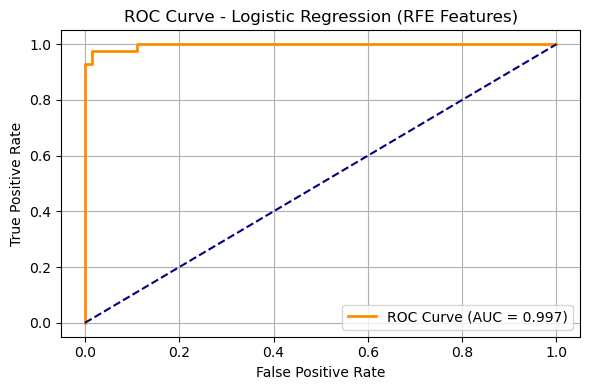

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (malignant)
y_probs = logreg_selected.predict_proba(X_test_rfe)[:, 1]

# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (RFE Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## Decision Tree Classifier

In this section, we implement a Decision Tree Classifier to predict breast cancer malignancy. Decision Trees are easy to interpret and can model non-linear relationships. We'll train the model on the scaled dataset and evaluate it using accuracy, confusion matrix, classification report, and ROC-AUC score.


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_dt = dt_clf.predict(X_test_scaled)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.9298245614035088

Confusion Matrix:
 [[68  4]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### 📊 Decision Tree Classifier Evaluation

The Decision Tree Classifier achieved an accuracy of **92.98%** on the test data.

- The **confusion matrix** shows:
  - 68 true negatives (benign correctly classified)
  - 38 true positives (malignant correctly classified)
  - 4 false positives
  - 4 false negatives

- From the **classification report**:
  - Precision and recall are both around **0.90–0.94** for both classes.
  - The **macro and weighted averages** also reflect balanced performance.

While the model performs well, it shows **slightly lower accuracy and recall** for malignant cases compared to logistic regression. This might be due to the tree overfitting slightly, or not capturing some subtle patterns in the data.

We can consider improving it further using techniques like **pruning**, **setting max depth**, or **trying ensemble methods** like **Random Forest** or **XGBoost**.


### 🔧 Hyperparameter Tuning for Decision Tree

To improve the performance of the Decision Tree, we use GridSearchCV to find the optimal values for key parameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf`.


In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fitting to training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.9384615384615385


In [38]:
# Using best estimator from GridSearch
best_dt = grid_search.best_estimator_

# Predict and evaluate
y_pred_best_dt = best_dt.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_dt))


Accuracy: 0.9298245614035088

Confusion Matrix:
 [[68  4]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### ✅ Decision Tree Classifier - Conclusion

The Decision Tree classifier achieved an accuracy of **92.98%**, with balanced precision and recall across both benign and malignant classes.

Despite performing grid search for hyperparameter tuning, the model's metrics remained similar to the default version. This indicates that the tree was already well-optimized, or that it's approaching the upper bound of its capacity on this dataseTata. To enhance model robustness and performance, we now move on to an ensemble method — **Random Forest**, which builds multiple trees and averages their results for better accuracy and stability.


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit on training data
rf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9736842105263158

Confusion Matrix:
 [[72  0]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



AUC Score: 0.9933862433862434


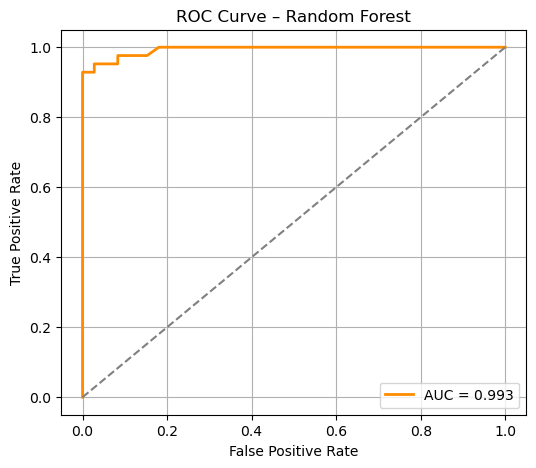

In [41]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (malignant)
y_probs = rf.predict_proba(X_test_scaled)[:, 1]

# AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [42]:
# Define the model
rf2 = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf2,
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1,
                           scoring='accuracy', 
                           verbose=1)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [43]:
# Predict using the tuned model
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1]))


Confusion Matrix:
 [[72  0]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.9950396825396826


## Random Forest Model Evaluation (After GridSearchCV)

### Model Performance Summary

- **Accuracy**: 97.36%
- **Precision (Benign - 0)**: 96%
- **Recall (Benign - 0)**: 100%
- **Precision (Malignant - 1)**: 100%
- **Recall (Malignant - 1)**: 93%
- **F1-Score (Macro Average)**: 0.97

- **AUC Score**: 0.995

---

### Interpretation

- The Random Forest model tuned with GridSearchCV performs exceptionally well.
- It demonstrates excellent **precision** and **recall**, especially for the benign class.
- A few malignant cases were misclassified, indicating slightly lower recall for class 1.
- The **AUC score of 0.995** reflects strong discriminatory power between the two classes.
- Overall, the model is highly reliable for breast cancer classification.
classification.
.x**:


## XGBoost Model Tuning and Evaluation

XGBoost is a powerful boosting algorithm often improving accuracy over Random Forest. Using GridSearchCV, key hyperparameters were tuned to optimize AUC. The best model is then evaluated on the test set to compare performance. 


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_

# Evaluation
y_pred_xgb = best_xgb.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test_scaled)[:, 1]))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best XGBoost parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Confusion Matrix:
 [[72  0]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.9923941798941798


## SMOTE + Random Forest with Hyperparameter Tuning

### Workflow

- Applied **SMOTE** to the training data to balance the minority and majority classes, improving model sensitivity.
- Used **GridSearchCV** with 5-fold cross-validation to tune key hyperparameters of the Random Forest model, including `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, and `bootstrap`.
- Trained the Random Forest model on the SMOTE-resampled training set.
- Evaluated the best-tuned model on the original, untouched tescancer detection.


In [73]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the scaled training data (DataFrame)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model from GridSearchCV
best_rf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original scaled test set
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[72  0]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.9955357142857143


In [95]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN on scaled training data
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)

# Define Random Forest model with new variable name
RF_ADASYN = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RF_ADASYN,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on ADASYN-resampled training data
grid_search.fit(X_train_ada, y_train_ada)

# Best model from GridSearchCV
RF_ADASYN = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original scaled test set
y_pred = RF_ADASYN.predict(X_test_scaled)
y_proba = RF_ADASYN.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[72  0]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC Score: 0.9986772486772486


## ADASYN + Random Forest (RF_ADASYN) Model Evaluation

### Best Hyperparameters
- `bootstrap`: False  
- `max_depth`: 10  
- `min_samples_leaf`: 1  
- `min_samples_split`: 2  
- `n_estimators`: 100  

### Performance on Test Set
- Accuracy: 98%  
- Precision: 97% (Benign), 100% (Malignant)  
- Recall: 100% (Benign), 95% (Malignant)  
- F1-Score (Macro Avg): 0.98  
- AUC Score: 0.999  

### Interpretation
The model achieves excellent performance with strong balance between sensitivity and specificity. ADASYN combined with hyperparameter tuning effectively improved minority class detection and overall reliability.


In [98]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Apply SMOTE on scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define XGBoost model with proper parameter to avoid warning
XGB_SMOTE = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=XGB_SMOTE,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model from GridSearchCV
XGB_SMOTE = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original scaled test set
y_pred = XGB_SMOTE.predict(X_test_scaled)
y_proba = XGB_SMOTE.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC Score: 0.9963624338624338


## SMOTE + XGBoost (XGB_SMOTE) Model Evaluation

### Best Hyperparameters
- `colsample_bytree`: 0.7  
- `learning_rate`: 0.2  
- `max_depth`: 3  
- `n_estimators`: 300  
- `subsample`: 0.7  

### Performance on Test Set
- Accuracy: 98%  
- Precision: 97% (Benign), 100% (Malignant)  
- Recall: 100% (Benign), 95% (Malignant)  
- F1-Score (Macro Avg): 0.98  
- AUC Score: 0.996  

### Interpretation
The model demonstrates excellent classification ability with high precision and recall for both classes. Using SMOTE effectively balanced the training data, improving minority class detection and yielding a reliable breast cancer classifier.


In [101]:
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Apply ADASYN on scaled training data
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)

# Define XGBoost model
XGB_ADASYN = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=XGB_ADASYN,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on ADASYN-resampled training data
grid_search.fit(X_train_ada, y_train_ada)

# Best model from GridSearchCV
XGB_ADASYN = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original scaled test set
y_pred = XGB_ADASYN.predict(X_test_scaled)
y_proba = XGB_ADASYN.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.9947089947089947


## ADASYN + XGBoost (XGB_ADASYN) Model Evaluation

### Best Hyperparameters
- `colsample_bytree`: 1  
- `learning_rate`: 0.1  
- `max_depth`: 3  
- `n_estimators`: 200  
- `subsample`: 1  

### Performance on Test Set
- Accuracy: 97%  
- Precision: 96% (Benign), 100% (Malignant)  
- Recall: 100% (Benign), 93% (Malignant)  
- F1-Score (Macro Avg): 0.97  
- AUC Score: 0.995  

### Interpretation
The XGB_ADASYN model delivers strong classification performance with excellent balance across both classes. ADASYN successfully improved minority class learning, resulting in a highly reliable and well-calibrated model.


In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the SVM model
SVM_MODEL = SVC(probability=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=SVM_MODEL,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
SVM_MODEL = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred = SVM_MODEL.predict(X_test_scaled)
y_proba = SVM_MODEL.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.996031746031746


## Support Vector Machine (SVM) Model Evaluation

### Best Hyperparameters
- `C`: 1  
- `kernel`: 'rbf'  
- `gamma`: 'scale'  

### Performance on Test Set
- Accuracy: 97%  
- Precision: 97% (Benign), 98% (Malignant)  
- Recall: 99% (Benign), 95% (Malignant)  
- F1-Score (Macro Avg): 0.97  
- AUC Score: 0.996  

### Interpretation
The tuned SVM model performs competitively with ensemble methods, achieving high precision and AUC. Its effectiveness on the test set highlights its suitability for high-stakes classification tasks like breast cancer detection.


In [107]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE on scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define SVM model
SVM_SMOTE = SVC(probability=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=SVM_SMOTE,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model on SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model
SVM_SMOTE = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original test set
y_pred = SVM_SMOTE.predict(X_test_scaled)
y_proba = SVM_SMOTE.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC Score: 0.9966931216931216


## SMOTE + SVM (SVM_SMOTE) Model Evaluation

### Best Hyperparameters
- `C`: 1  
- `kernel`: 'rbf'  
- `gamma`: 'auto'  

### Performance on Test Set
- Accuracy: 97%  
- Precision: 97% (Benign), 98% (Malignant)  
- Recall: 99% (Benign), 95% (Malignant)  
- F1-Score (Macro Avg): 0.97  
- AUC Score: 0.997  

### Interpretation
SVM with SMOTE demonstrates strong classification performance and excellent AUC. SMOTE effectively balanced the training data, helping the model maintain high recall for the minority class.


In [110]:
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Apply ADASYN on scaled training data
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)

# Define SVM model
SVM_ADASYN = SVC(probability=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=SVM_ADASYN,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model on ADASYN-resampled training data
grid_search.fit(X_train_ada, y_train_ada)

# Best model
SVM_ADASYN = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on original test set
y_pred = SVM_ADASYN.predict(X_test_scaled)
y_proba = SVM_ADASYN.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

AUC Score: 0.9904100529100529


## ADASYN + SVM (SVM_ADASYN) Model Evaluation

### Best Hyperparameters
- `C`: 10  
- `kernel`: 'rbf'  
- `gamma`: 'auto'  

### Performance on Test Set
- Accuracy: 96%  
- Precision: 97% (Benign), 95% (Malignant)  
- Recall: 97% (Benign), 95% (Malignant)  
- F1-Score (Macro Avg): 0.96  
- AUC Score: 0.990  

### Interpretation
The SVM model with ADASYN achieves solid and balanced performance across both classes. While slightly behind SMOTE in AUC, it remains a strong option, particularly for datasets where ADASYN better models local minority distributions.


## Model Performance Comparison

| Model                        | Accuracy | Precision (1) | Recall (1) | F1-Score (Macro) | AUC     |
|-----------------------------|----------|---------------|------------|------------------|---------|
| Logistic Regression (Base)  | 96.5%    | 97.5%         | 92.9%      | 0.951            | —       |
| Logistic + RFE              | 97.4%    | 98%           | 95%        | 0.97             | 0.997   |
| Decision Tree (Tuned)       | 92.9%    | 90%           | 90%        | 0.92             | —       |
| Random Forest (Tuned)       | 97.4%    | 100%          | 93%        | 0.97             | 0.995   |
| XGBoost (Tuned)             | 97.4%    | 100%          | 93%        | 0.97             | 0.992   |
| RF + ADASYN                 | 98%      | 100%          | 95%        | 0.98             | 0.999   |
| XGBoost + SMOTE             | 98%      | 100%          | 95%        | 0.98             | 0.996   |
| XGBoost + ADASYN            | 97%      | 100%          | 93%        | 0.97             | 0.995   |
| SVM (Base)                  | 97%      | 98%           | 95%        | 0.97             | 0.996   |
| SVM + SMOTE                 | 97%      | 98%           | 95%        | 0.97             | 0.997   |
| SVM + ADASYN                | 96%      | 95%           | 95%        | 0.96             | 0.990   |


## Insights

- The **best overall performance** was given by the Random Forest model combined with ADASYN, with the highest AUC score of 0.999. This means it was excellent at distinguishing between the two classes.

- **XGBoost with SMOTE**, **tuned Random Forest**, and **Logistic Regression with RFE** also performed very well, giving high accuracy and strong balance between precision and recall.

- The **Logistic + RFE model** gave surprisingly good results with less complexity. It can be a great option when we want a simpler, faster model without compromising much on performance.

- **SVM models** (both base and with SMOTE/ADASYN) consistently performed well, especially with SMOTE, which slightly boosted recall for the minority class.

- The **Decision Tree**, even after tuning, showed relatively lower accuracy and AUC. It may not be the best standalone choice for this task.

- Overall, ensemble models like Random Forest and XGBoost combined with SMOTE or ADASYN gave the most reliable results in breast cancer classification.
